In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

import seaborn as sns
import random as rn
import copy as copy

import time

c:\Users\Lavigi\programmi\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('imbd_cleaned.csv')

X = df.select_dtypes(include=['number'])
X = X.drop(['averageRating'], axis = 1)
X = X.values
y = np.array(df['averageRating'])

## Data Partitioning

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
clf = HistGradientBoostingClassifier(learning_rate=1.0, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.36725127837086213
F1-score [0.         0.         0.00516796 0.00383509 0.02125399 0.27648202
 0.32591205 0.52907553 0.09114359 0.03255485]


c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       141
      (2, 3]       0.03      0.00      0.01       353
      (3, 4]       0.12      0.00      0.00      1027
      (4, 5]       0.29      0.01      0.02      2719
      (5, 6]       0.29      0.27      0.28      6372
      (6, 7]       0.32      0.33      0.33     11643
      (7, 8]       0.42      0.72      0.53     14463
      (8, 9]       0.24      0.06      0.09      6563
     (9, 10]       0.17      0.02      0.03      1281

    accuracy                           0.37     44588
   macro avg       0.19      0.14      0.13     44588
weighted avg       0.32      0.37      0.31     44588



c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# XGBoost
https://xgboost.readthedocs.io/en/stable/python/python_intro.html

In [27]:
# !pip install xgboost

In [35]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

reg = XGBRegressor(tree_method='exact', use_label_encoder=True, random_state=42)

# Definisci la griglia di parametri
param_dist = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0, 1, 10],
    'reg_alpha': [0, 0.1, 1]
}

# Specifica il numero di iterazioni
n_iter = 50 # Puoi modificare questo valore in base alle tue esigenze

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, scoring='neg_mean_squared_error',
    cv=3, verbose=2, n_jobs=-1, n_iter=n_iter, error_score='raise')

# Esegui la random search
random_search.fit(X_train, y_train)

# Stampa i migliori parametri
print("Migliori parametri trovati:", random_search.best_params_)
print("Miglior punteggio:", random_search.best_score_)



Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\Lavigi\programmi\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:26:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Migliori parametri trovati: {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.8}
Miglior punteggio: -1.2554743276377085


In [39]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
import numpy as np

# Definisci il modello con i migliori iperparametri trovati
best_model = XGBRegressor(
    tree_method='exact', 
    use_label_encoder=True, 
    random_state=42,
    subsample=1.0,
    reg_lambda=10,  # Aggiornato
    reg_alpha=1,
    n_estimators=200,  # Aggiornato
    max_depth=9,
    learning_rate=0.2,  # Aggiornato
    gamma=0.3,  # Aggiornato
    colsample_bytree=0.8  # Aggiornato
)

# Addestra il modello con i dati di addestramento
best_model.fit(X_train, y_train)

# Effettua le predizioni con i dati di test
y_pred = best_model.predict(X_test)

# Calcola e stampa le metriche di valutazione
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

c:\Users\Lavigi\programmi\Lib\site-packages\xgboost\training.py:183: UserWarning:

[12:20:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




R2: 0.323
MSE: 1.231
MAE: 0.814


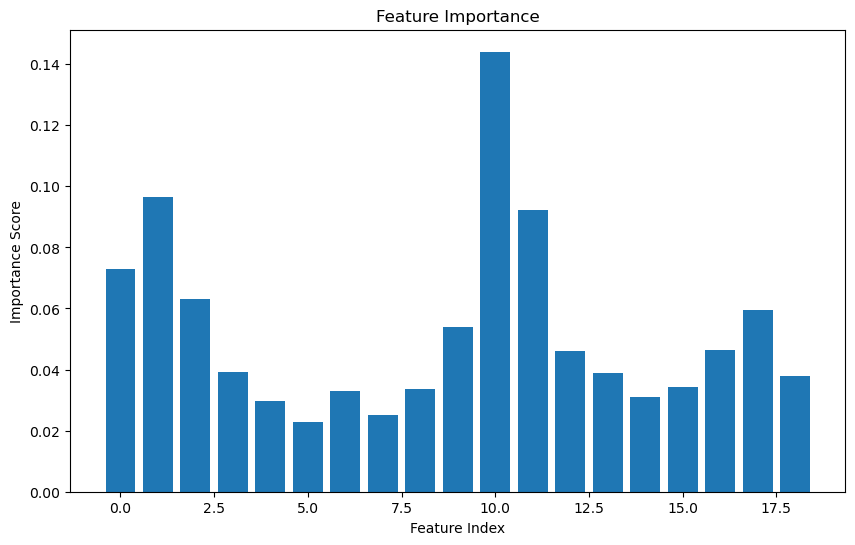

In [40]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Calcola la feature importance
importance = best_model.feature_importances_

# Crea un grafico per visualizzare la feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.show()

In [41]:
df_num = df.select_dtypes(include=['number'])
type(list(df_num.columns))

list

In [43]:
df_num = df_num.drop(['averageRating'], axis = 1)

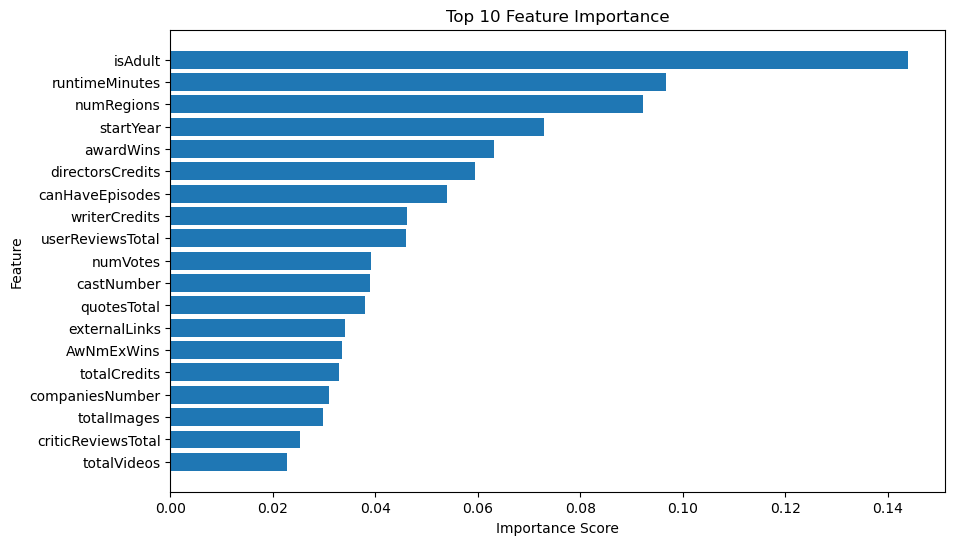

In [44]:
import pandas as pd

# Supponiamo che X_train sia un array di NumPy
# Converti X_train in un DataFrame di Pandas
X_train_df = pd.DataFrame(X_train, columns=df_num.columns)  # Sostituisci con i nomi delle tue feature

# Calcola la feature importance
importance = best_model.feature_importances_

# Crea un DataFrame con i nomi delle feature e la loro importanza
feature_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': importance
})

# Ordina il DataFrame per importanza decrescente e seleziona le prime 10 feature
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(19)

# Crea un grafico a barre per visualizzare le 10 feature più importanti
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.show()
